#### Mulit fidelity outputs
This notebook generates multi-fidelity output of the homeless care services. We have a fluid flow model, an $M_t/M/h_t$ queueing model and a high fidelity simulation model. 

In [1]:
import queueing_model as qm
import fluid_flow_model as fl
import simulation_model as sm
import matplotlib.pyplot as plt
import json
import scipy
import matplotlib.pyplot as plt

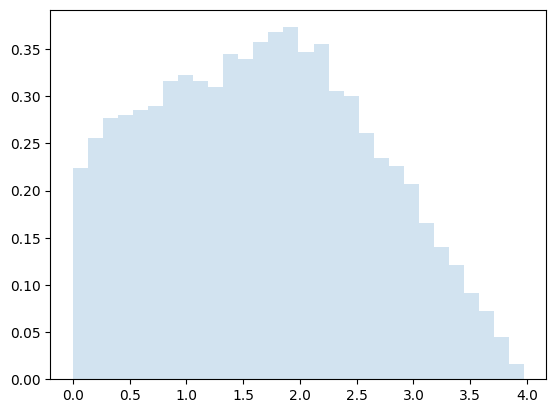

In [2]:
X = []
service_dist = {'low':0,'mid':6,'high':8}
c = (service_dist['mid'] - service_dist['low']) / (service_dist['high'] - service_dist['low'])
loc = service_dist['low']
scale = service_dist['high'] - service_dist['low']
x_0 = 4
for i in range(10000):
    generating = True
    while generating:
        x = scipy.stats.triang.rvs(c,loc,scale)
        if x >= x_0:
            time_in_accomm = x-x_0
            generating = False
    X.append(time_in_accomm)

fig, ax = plt.subplots(1, 1)    
ax.hist(X, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()

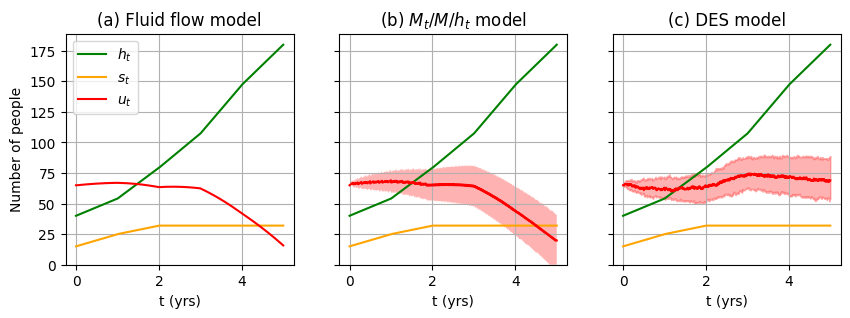

In [3]:
# Data
with open('../data/data.json') as json_file:
    data = json.load(json_file)

solution = data['solution']

# Fluid
f = fl.FluidFlowModel(data, solution)
f.analyse()

# Queue
q = qm.Queue(data, solution)
q.analyse()

# DES
s = sm.SimulationModel(data, solution)
s.analyse()

# PLOTTING

# general plotting setup
fig, axs = plt.subplots(1, 3,  figsize=(10, 3))
ymax = max(f.h + f.s + f.u)
        
# plot solution
x = [i/365 for i in range((f.T_a+f.T_b)*365)]

axs[0].plot(x, f.h, color = 'green')
axs[0].plot(x, f.s, color = 'orange')
axs[0].plot(x, f.u, color = 'red')
axs[0].legend(["$h_t$", "$s_t$", "$u_t$"], loc="upper left")
axs[0].set(title = "(a) Fluid flow model")

axs[1].plot(x, q.h, color = 'green')
axs[1].plot(x, q.s, color = 'orange')
axs[1].plot(x, q.num_unsheltered, color = 'red')
axs[1].fill_between(x, q.upc['low'], q.upc['high'], facecolor = 'red', alpha = 0.3)
axs[1].set(title = "(b) $M_t/M/h_t$ model")

axs[2].plot(x, s.h, color = 'green')
axs[2].plot(x, s.s, color = 'orange')
axs[2].plot(x, s.median, color = 'red')
axs[2].fill_between(x, s.low, s.high, color='red', alpha=0.3)
axs[2].set(title = "(c) DES model")

# formatting
for ax in axs.flat:
    ax.set(xlabel='t (yrs)', ylabel='Number of people')
    ax.grid()
    ax.set_ylim(0, ymax*1.05)
    ax.label_outer()
        
# display
plt.show()
